In [ ]:
### Continue to work on the assignment by:
### Convert market size and area to numbers
### Continue to build linear regression model using the rest of the features.

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import graphviz


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
from matplotlib import  pyplot as palette

df = pd.read_excel("https://github.com/theleadio/datascience_demo/blob/master/social-ads-raw.xlsx?raw=true")

# **1. Obtain data**

In [ ]:
#value in thousand dollar > google, facebook, instagram
#value in thousand unit > sales
df

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,suburban
196,197,94.2,4.9,8.1,9.7,small,urban
197,198,177.0,9.3,6.4,12.8,small,suburban
198,199,283.6,42.0,66.2,25.5,small,rural


In [ ]:
df.head()

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban


In [ ]:
df.describe()

,segment,google,facebook,instagram,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


In [ ]:
# Data Explanation
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) 

segment                200 	 [1, 2, 3]
google                 190 	 [0.7, 4.1, 5.4]
facebook               167 	 [0.0, 0.3, 0.4]
instagram              172 	 [0.3, 0.9, 1.0]
sales                  121 	 [1.6, 3.2, 4.8]
size                     2 	 ['large', 'small']
area                     3 	 ['rural', 'suburban', 'urban']


# **2. Scrub Data**

In [ ]:
# Data Explanation
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d} \t'.format(column,len(uniques)),uniques[:3]) 

segment                200 	 [1, 2, 3]
google                 190 	 [0.7, 4.1, 5.4]
facebook               167 	 [0.0, 0.3, 0.4]
instagram              172 	 [0.3, 0.9, 1.0]
sales                  121 	 [1.6, 3.2, 4.8]
size                     2 	 ['large', 'small']
area                     3 	 ['rural', 'suburban', 'urban']


In [ ]:
df = df.dropna()

#**3. Explore Data**

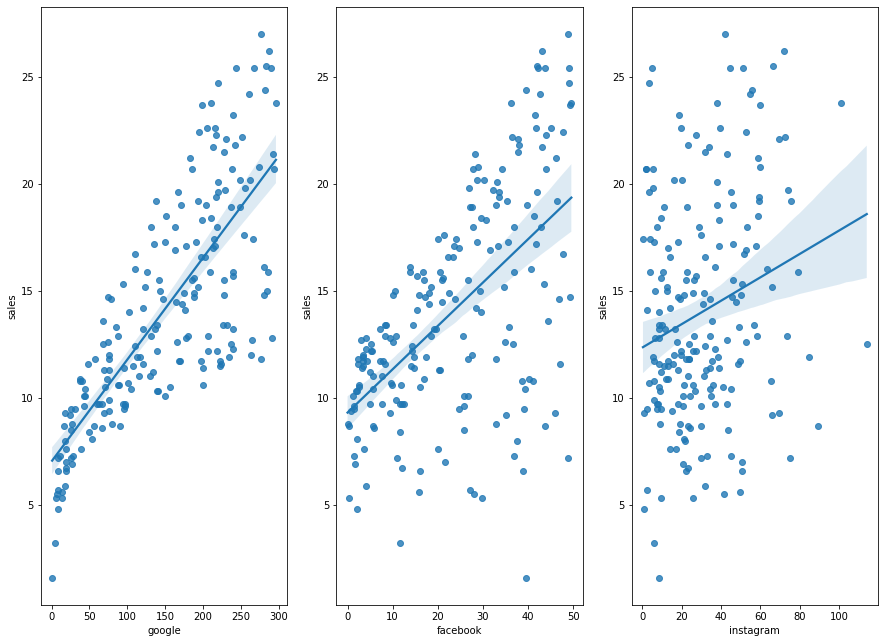

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(15,11))
sns.regplot(data=df, x="google", y="sales", ax=subplots[0])
sns.regplot(data=df, x="facebook", y="sales", ax=subplots[1])
sns.regplot(data=df, x="instagram",y="sales", ax=subplots[2])


### **Explanation**
Compare among google, facebook and instagram, google is more matched on the data point, and more predictable.


#**4. Modelling**

#### 4.1. Modelling > Test Case 1 - Predict sales by using google

In [ ]:
def fncCalculate(cX1, nBudget):  
  #cX1 = google
  #
  features = [cX1]
  train_data = df[features] # google
  train_target = df['sales']   # sales

  train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
  model = LinearRegression()
  model.fit(train_X, train_y)

  nResult = model.score(test_X, test_y)
  nResult = "{:.2f} %".format(nResult * 100)

  print("1. The performance of this model [" + cX1 + "] R2 score is ", nResult)

  arrcoef = model.coef_
  ncoef = arrcoef[0]
  print("2. coefficients is [" + str(ncoef) + "] mean every thousand dollar we spent on " + cX1 + " (advertisement) is going to bring us " + str(round(ncoef * 1000, 2)) + " unit of our product sold")
  
  nintercept = model.intercept_
  print("4. intercept is [" + str(nintercept) + "] mean the number of unit [" +str(round(nintercept * 1000, 2)) + "] we can still sell if we didnt put any advertisement budget in " + cX1)

  #value in thousand dollar > google, facebook, instagram
  #value in thousand unit > sales
  # y = a1(coefficients) X1 + C(intercept)
  # 1000 = value in thousand dollar
  # 20 = budget is 20k

  unit_price = 5000
  nRevenue = ((ncoef * nBudget) + nintercept * 1000) * unit_price
  nRevenue = "{:,.2f}".format(nRevenue)
  print("5. Predicted revenue will be return if advertising by " + cX1 + " when budget is " + str(nBudget) + "k is $", nRevenue)

In [ ]:
# Test Case 1 - Predict sales by using google

cX1 = 'google'
fncCalculate(cX1, 20)

1. The performance of this model [google] R2 score is  57.51 %
2. coefficients is [0.04812204162796225] mean every thousand dollar we spent on google (advertisement) is going to bring us 48.12 unit of our product sold
4. intercept is [6.923519536059553] mean the number of unit [6923.52] we can still sell if we didnt put any advertisement budget in google
5. Predicted revenue will be return if advertising by google when budget is 20k is $ 34,622,409.88


In [ ]:
# Test Case 2 - Predict sales by using facebook

cX1 = 'facebook'
fncCalculate(cX1, 20)

1. The performance of this model [facebook] R2 score is  41.29 %
2. coefficients is [0.18748080198244713] mean every thousand dollar we spent on facebook (advertisement) is going to bring us 187.48 unit of our product sold
4. intercept is [9.440936561425884] mean the number of unit [9440.94] we can still sell if we didnt put any advertisement budget in facebook
5. Predicted revenue will be return if advertising by facebook when budget is 20k is $ 47,223,430.89


In [ ]:
# Test Case 3 - Predict sales by using instagram

cX1 = 'instagram'
fncCalculate(cX1, 20)

1. The performance of this model [instagram] R2 score is  -2.50 %
2. coefficients is [0.06532044810852325] mean every thousand dollar we spent on instagram (advertisement) is going to bring us 65.32 unit of our product sold
4. intercept is [11.829668884877877] mean the number of unit [11829.67] we can still sell if we didnt put any advertisement budget in instagram
5. Predicted revenue will be return if advertising by instagram when budget is 20k is $ 59,154,876.47


#**5. Interpret**

**google**
1. The performance of this model [google] R2 score is  57.51 %
2. coefficients is [0.04812204162796225] mean every thousand dollar we spent on google (advertisement) is going to bring us 48.12 unit of our product sold
4. intercept is [6.923519536059553] mean the number of unit [6923.52] we can still sell if we didnt put any advertisement budget in google
5. Predicted revenue will be return if advertising by google when budget is 20k is $ 34,622,409.88

**facebook**
1. The performance of this model [facebook] R2 score is  41.29 %
2. coefficients is [0.18748080198244713] mean every thousand dollar we spent on facebook (advertisement) is going to bring us 187.48 unit of our product sold
4. intercept is [9.440936561425884] mean the number of unit [9440.94] we can still sell if we didnt put any advertisement budget in facebook
5. Predicted revenue will be return if advertising by facebook when budget is 20k is $ 47,223,430.89

**instagram**
1. The performance of this model [instagram] R2 score is  -2.50 %
2. coefficients is [0.06532044810852325] mean every thousand dollar we spent on instagram (advertisement) is going to bring us 65.32 unit of our product sold
4. intercept is [11.829668884877877] mean the number of unit [11829.67] we can still sell if we didnt put any advertisement budget in instagram
5. Predicted revenue will be return if advertising by instagram when budget is 20k is $ 59,154,876.47

**Comparison**

R-Square score > Comparison among google, facebook and instagram
google is the highest among facebook and instagram, which is 57.71%

coefficients > Comparison among google, facebook and instagram
facebook is the highest among google and instagram, which is 0.18748080198244713

intercept > Comparison among google, facebook and instagram
instagram is the highest among google and facebook, which is 11.829668884877877

**As conclusion**, 
1. Every thousand dollar we spend on facebook, it can bring more product sold.
2. If we didn't allocate any budget on instagram, then still can more product sold. Which mean we can decide not need to spend money to advertise by instagram. 
3. Even though the R-square score for google is the highest among them, but look at the predicted revenue will be return when budget is 20k, surprisingly instagram is the highest among them

## **Assignment # 1**. Convert market size and area to numbers

In [ ]:
# Duplicate size and area without change existing field
df.insert(6, "Marketsize", df['size'] , True)
df.insert(8, "Marketarea", df['area'] , True)
df

,segment,google,facebook,instagram,sales,size,Marketsize,area,Marketarea
0,1,230.1,37.8,69.2,22.1,large,large,rural,rural
1,2,44.5,39.3,45.1,10.4,small,small,urban,urban
2,3,17.2,45.9,69.3,9.3,small,small,rural,rural
3,4,151.5,41.3,58.5,18.5,small,small,urban,urban
4,5,180.8,10.8,58.4,12.9,large,large,suburban,suburban
...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,small,suburban,suburban
196,197,94.2,4.9,8.1,9.7,small,small,urban,urban
197,198,177.0,9.3,6.4,12.8,small,small,suburban,suburban
198,199,283.6,42.0,66.2,25.5,small,small,rural,rural


In [ ]:
# 1. Convert market size and area to numbers
# to map Marketsize (large/small) to binary value (1/0)
df['Marketsize'] = df['Marketsize'].map({"small": 0, "large": 1})
df = pd.get_dummies(data=df, columns=['Marketarea'])
df

,segment,google,facebook,instagram,sales,size,Marketsize,area,Marketarea_rural,Marketarea_suburban,Marketarea_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,1,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,1,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban,0,1,0
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,0,1,0
198,199,283.6,42.0,66.2,25.5,small,0,rural,1,0,0


## **Assignment # 2**. Continue to build linear regression model using the rest of the features.

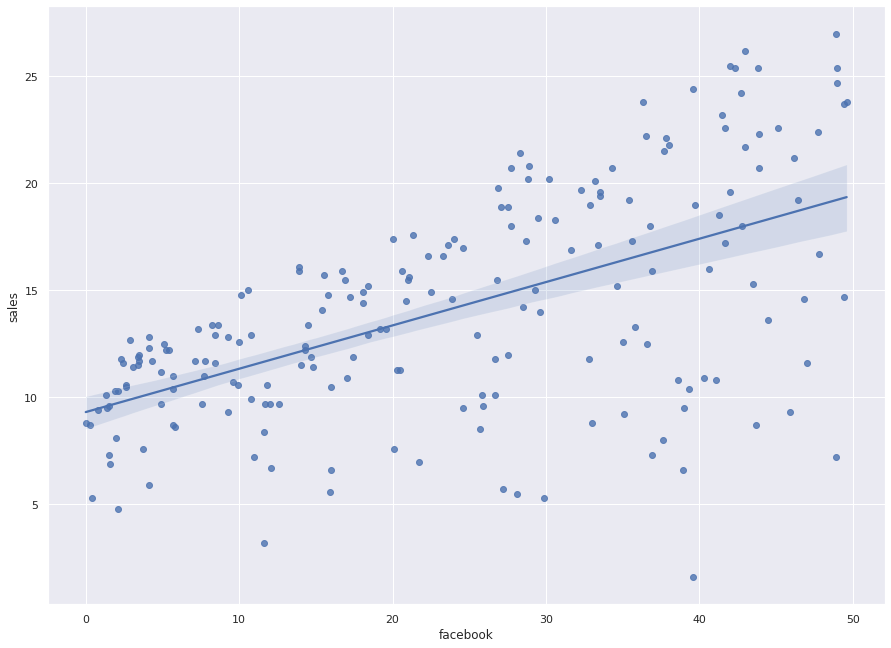

In [ ]:
#sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="facebook", y="sales", data=df.sample(200))

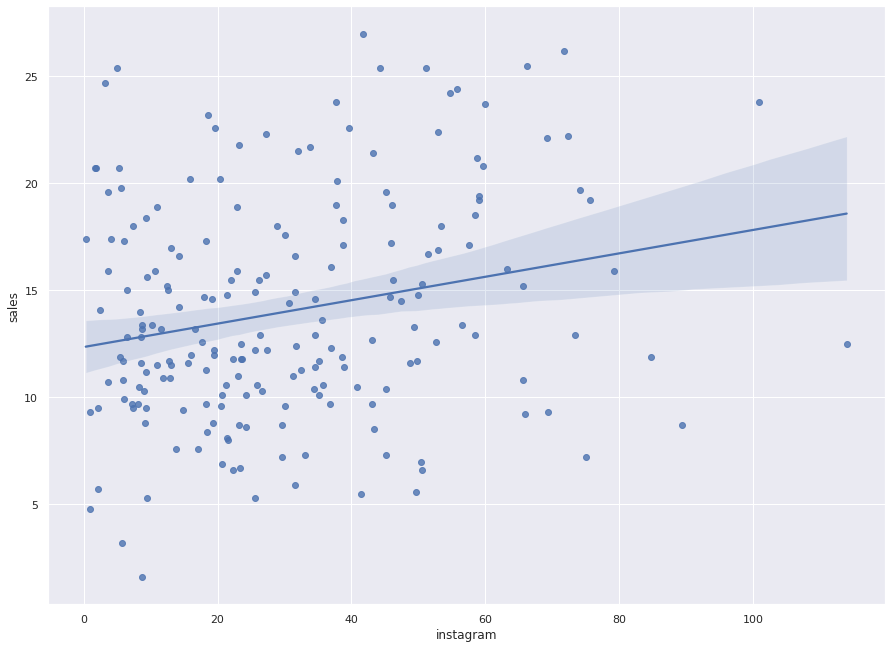

In [ ]:
#sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="instagram", y="sales", data=df.sample(200))

**facebook**
1. The performance of this model [facebook] R2 score is  41.29 %
2. coefficients is [0.18748080198244713] mean every thousand dollar we spent on facebook (advertisement) is going to bring us 187.48 unit of our product sold
4. intercept is [9.440936561425884] mean the number of unit [9440.94] we can still sell if we didnt put any advertisement budget in facebook
5. Predicted revenue will be return if advertising by facebook when budget is 20k is $ 47,223,430.89

**instagram**
1. The performance of this model [instagram] R2 score is  -2.50 %
2. coefficients is [0.06532044810852325] mean every thousand dollar we spent on instagram (advertisement) is going to bring us 65.32 unit of our product sold
4. intercept is [11.829668884877877] mean the number of unit [11829.67] we can still sell if we didnt put any advertisement budget in instagram
5. Predicted revenue will be return if advertising by instagram when budget is 20k is $ 59,154,876.47

I try explore other features, e.g. **Marketsize, Marketarea_rural, Marketarea_suburban, Marketarea_urban** as below, but it does not give the correct linear regression result.

I guess it should be due to this features is binary number, as i know linear regression model should use continuous data rather than binary data.

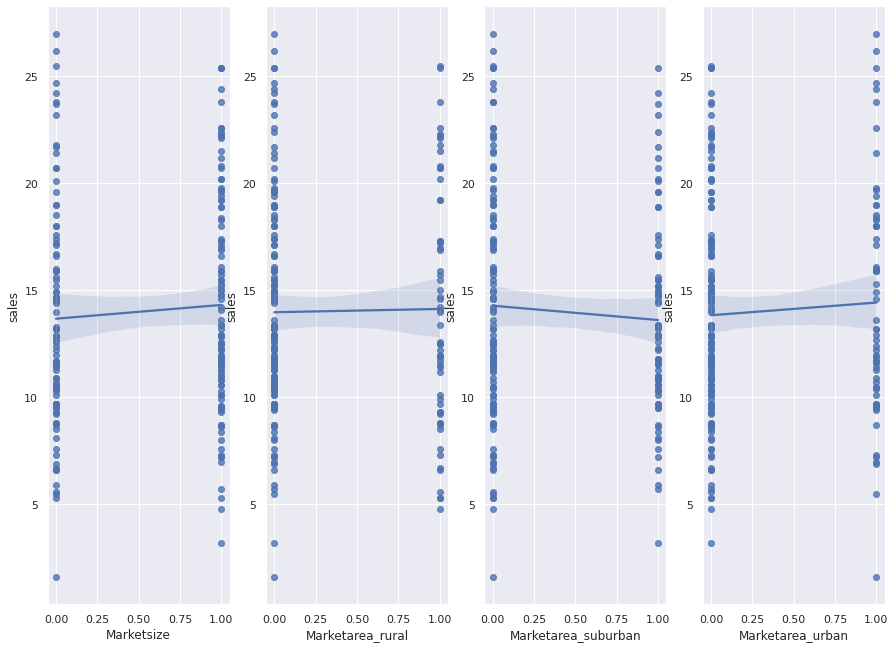

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(15,11))
sns.regplot(data=df, x="Marketsize", y="sales", ax=subplots[0])
sns.regplot(data=df, x="Marketarea_rural", y="sales", ax=subplots[1])
sns.regplot(data=df, x="Marketarea_suburban",y="sales", ax=subplots[2])
sns.regplot(data=df, x="Marketarea_urban",y="sales", ax=subplots[3])

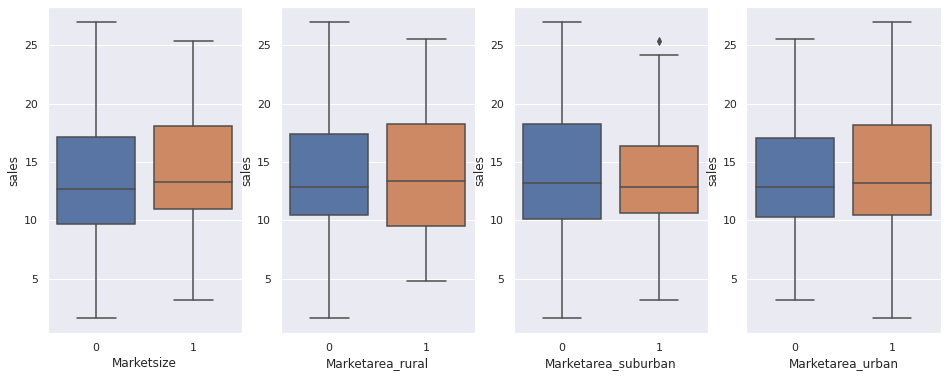

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(16,6))
sns.boxplot(data=df, y="sales", x="Marketsize", ax=subplots[0])
sns.boxplot(data=df, y="sales", x="Marketarea_rural", ax=subplots[1])
sns.boxplot(data=df, y="sales", x="Marketarea_suburban", ax=subplots[2])
sns.boxplot(data=df, y="sales", x="Marketarea_urban", ax=subplots[3])

### Explanation

1. The larger marker size it is, the higher sales will be return

2. When market area is rural, there is higher sales is returned

3. When martket area is suburban, there is lower sales is returned

4. When market area is urban, there is higher sales is returned.

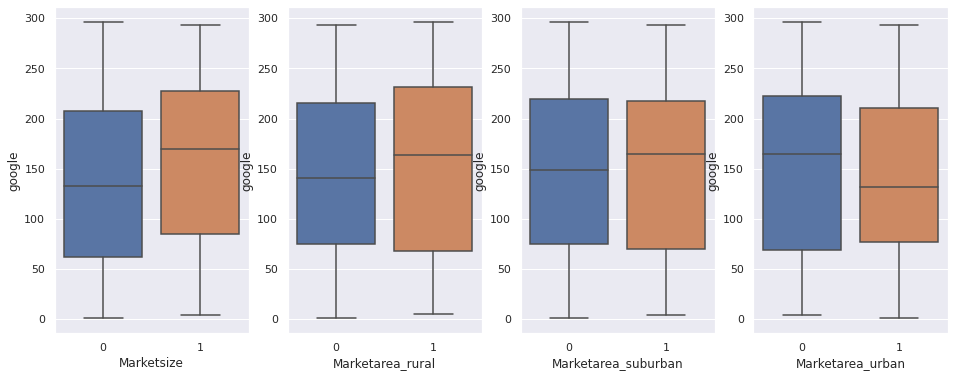

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(16,6))
sns.boxplot(data=df, y="google", x="Marketsize", ax=subplots[0])
sns.boxplot(data=df, y="google", x="Marketarea_rural", ax=subplots[1])
sns.boxplot(data=df, y="google", x="Marketarea_suburban", ax=subplots[2])
sns.boxplot(data=df, y="google", x="Marketarea_urban", ax=subplots[3])

### Explanation

1. The larger marker size it is, it will be more advertised by google.

2. Look at the boxplot, it seem like google is more focus on market area = rural


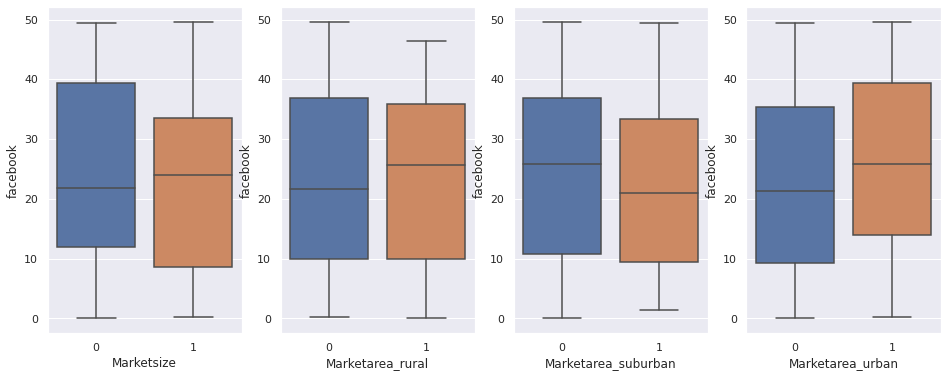

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(16,6))
sns.boxplot(data=df, y="facebook", x="Marketsize", ax=subplots[0])
sns.boxplot(data=df, y="facebook", x="Marketarea_rural", ax=subplots[1])
sns.boxplot(data=df, y="facebook", x="Marketarea_suburban", ax=subplots[2])
sns.boxplot(data=df, y="facebook", x="Marketarea_urban", ax=subplots[3])

### Explanation

1. The larger marker size it is, they are not going to advertised by facebook.

2. Look at the boxplot, it seem like facebook is more focus on market area = urban


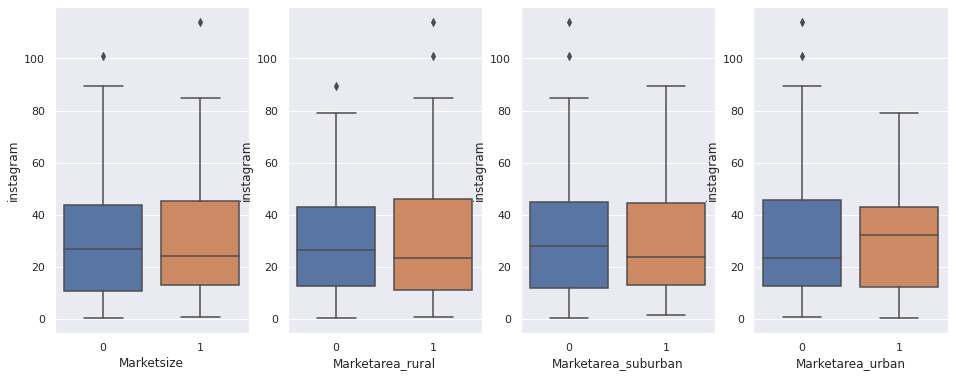

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(16,6))
sns.boxplot(data=df, y="instagram", x="Marketsize", ax=subplots[0])
sns.boxplot(data=df, y="instagram", x="Marketarea_rural", ax=subplots[1])
sns.boxplot(data=df, y="instagram", x="Marketarea_suburban", ax=subplots[2])
sns.boxplot(data=df, y="instagram", x="Marketarea_urban", ax=subplots[3])

### Explanation

1. look at the boxplot, comparison between small and large market size, they are more or less is tended to advertised by using instagram.

2. Look at the boxplot, it seem like instagram is quite balance target on market area = rural/suburban/urban


In [ ]:
features = ['Marketsize']
train_data = df[features] # Market Size
train_target = df['sales']   # sales

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)


LinearRegression()

In [ ]:
model.score(test_X, test_y)

-0.015178942689945796

### Explanation

1. As market size is binary data and I not able to get correct linear regression model, thus the outcome of perfomance of Linear regression model is negative value, which is not really make sense.

